In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Amazon Sales data.csv")

In [3]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [4]:
df.tail(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
df.shape

(100, 14)

In [7]:
# Separate categorical and numerical columns
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print("\033[1mCategorical Columns:\033[0m", categorical_columns,sep="\n")
print()
print()

print("\033[1mNumerical Columns:\033[0m", numerical_columns)

Categorical Columns:
['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Ship Date']


Numerical Columns: ['Order ID', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']


## CHECKING FOR MISSING AND DUPLICATE VALUES

In [8]:
df.isnull().sum().any()

False

In [9]:
df.duplicated().sum().any()

False

NO MISSING AND DUPLICATE VALUES ARE IN DATASET

In [10]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.0,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.8,328376.44,248406.36


## Checking unique values in different columns

In [11]:
df['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [12]:
y=df['Region'].value_counts()

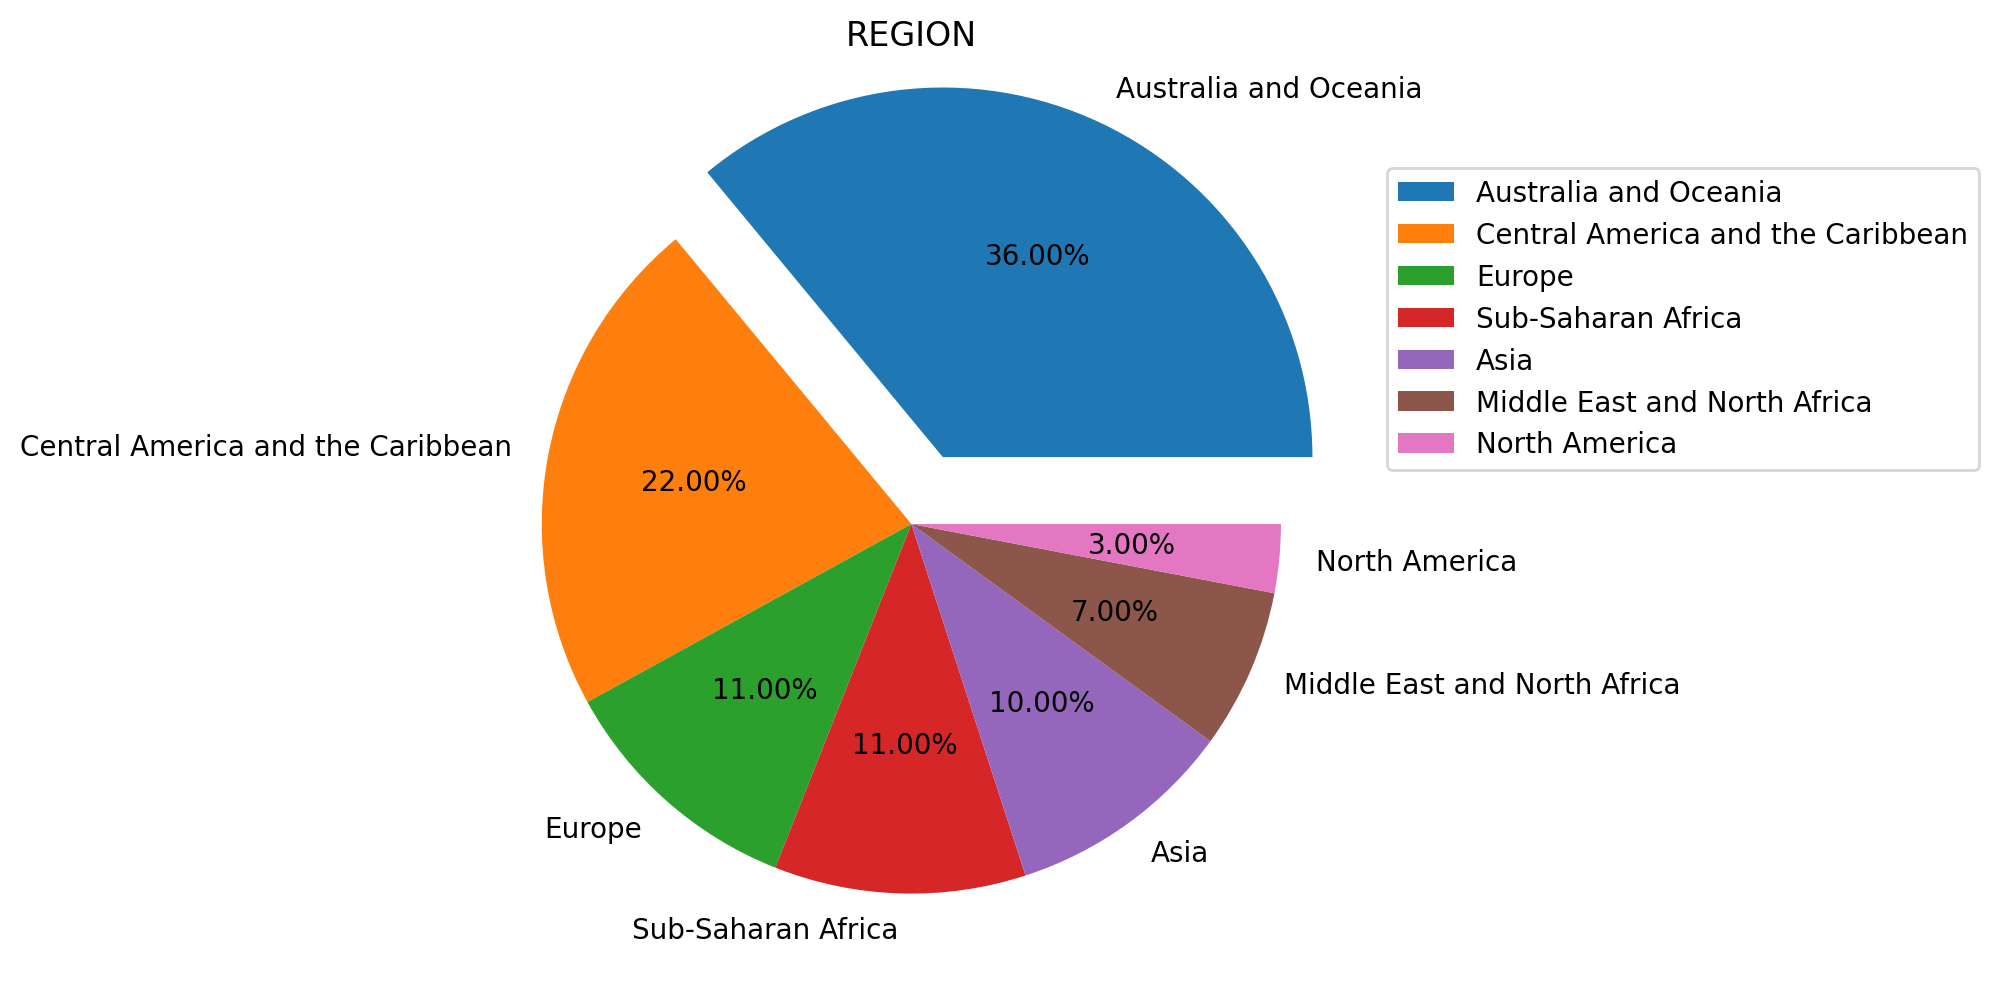

In [13]:
s=df['Region'].unique()
ex=[0.2,0,0,0,0,0,0]
plt.figure(figsize=(12,6),dpi=200)
plt.pie(y,labels=s,explode=ex,autopct='%1.2f%%')
plt.legend(s,bbox_to_anchor=(1, 0.9))
plt.title("REGION")
plt.show()


In [14]:
df['Country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [15]:
df['Country'].value_counts()

The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: Country, Length: 76, dtype: int64

## ANALYSING THE COLUMN "ITEM TYPE"

In [16]:
df['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [17]:
df['Item Type'].value_counts()

Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: Item Type, dtype: int64

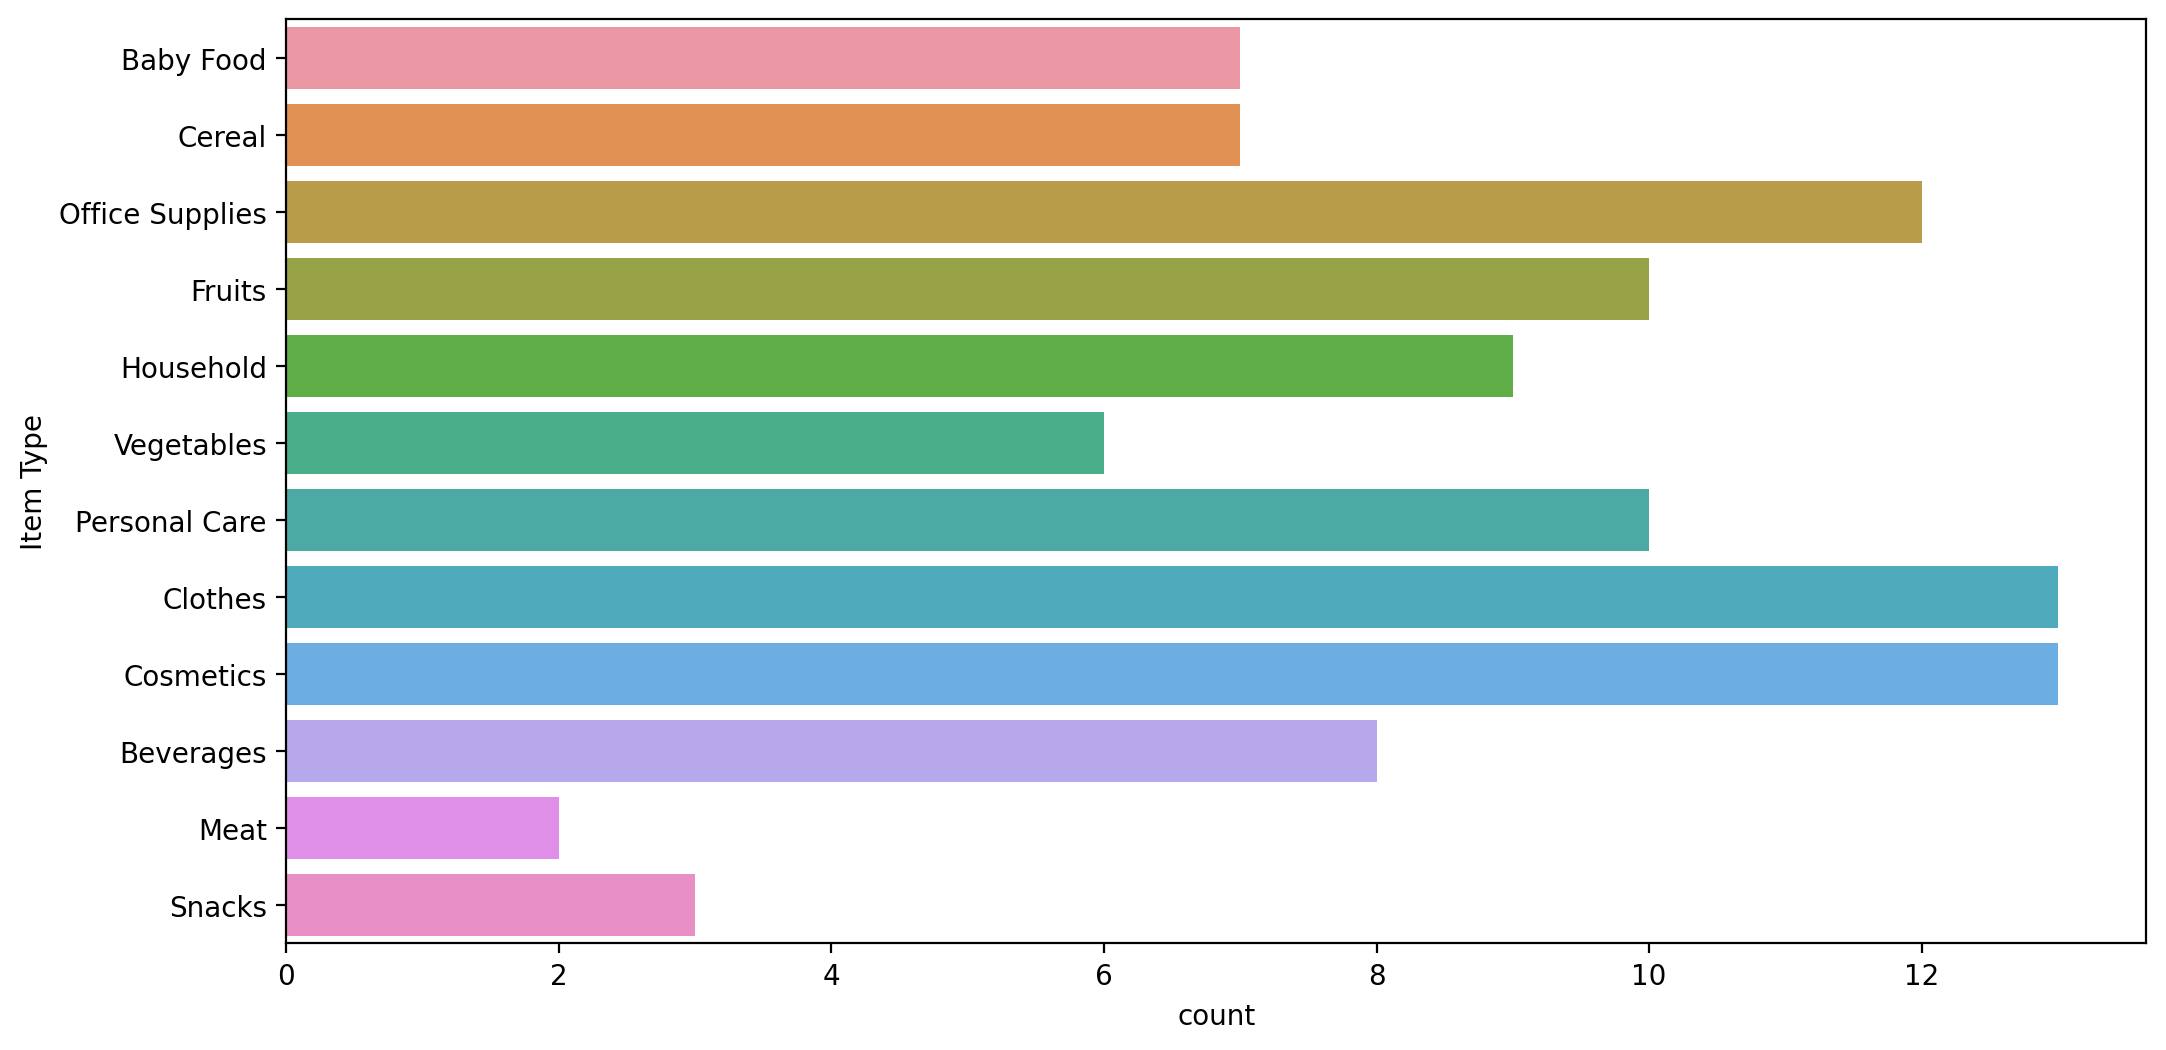

In [18]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(y = df['Item Type'])
plt.show()

## ANALYSING THE COLUMN "Sales Channel	"

In [19]:
df['Sales Channel'].unique()

array(['Offline', 'Online'], dtype=object)

In [20]:
df['Sales Channel'].value_counts()

Offline    50
Online     50
Name: Sales Channel, dtype: int64

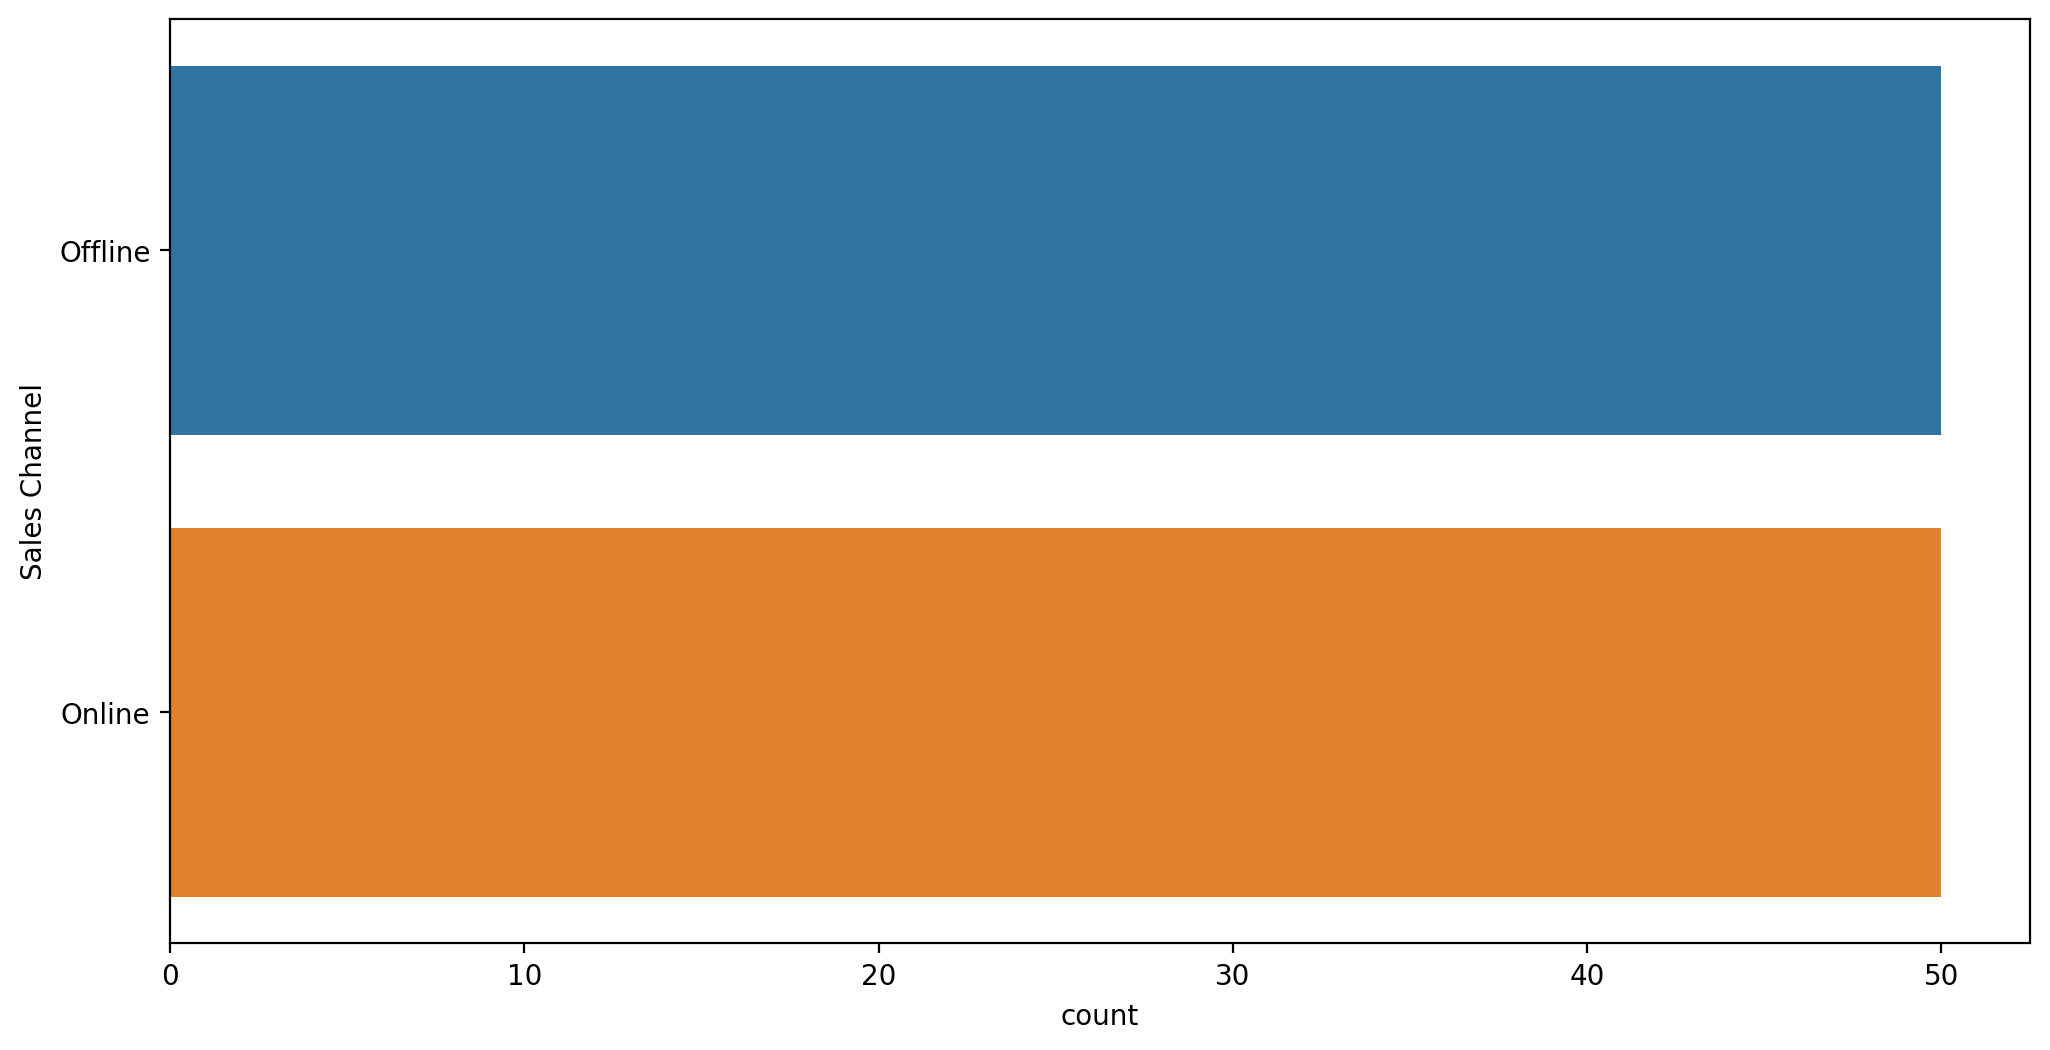

In [21]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(y = df['Sales Channel'])
plt.show()

In [22]:
online_sales=df['Sales Channel'].value_counts()[0]
offline_sales=df['Sales Channel'].value_counts()[0]
perc1=online_sales/len(df)*100
perc2=online_sales/len(df)*100
print("Percentage Of Online Sales Channel : {:.2f}%".format(perc1))
print("Percentage Of Offline Sales Channel: {:.2f}%".format(perc2))


Percentage Of Online Sales Channel : 50.00%
Percentage Of Offline Sales Channel: 50.00%


## ANALYSING THE COLUMN "Order Priority	"

In [23]:
df['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

In [24]:
df['Order Priority'].value_counts()

H    30
L    27
C    22
M    21
Name: Order Priority, dtype: int64

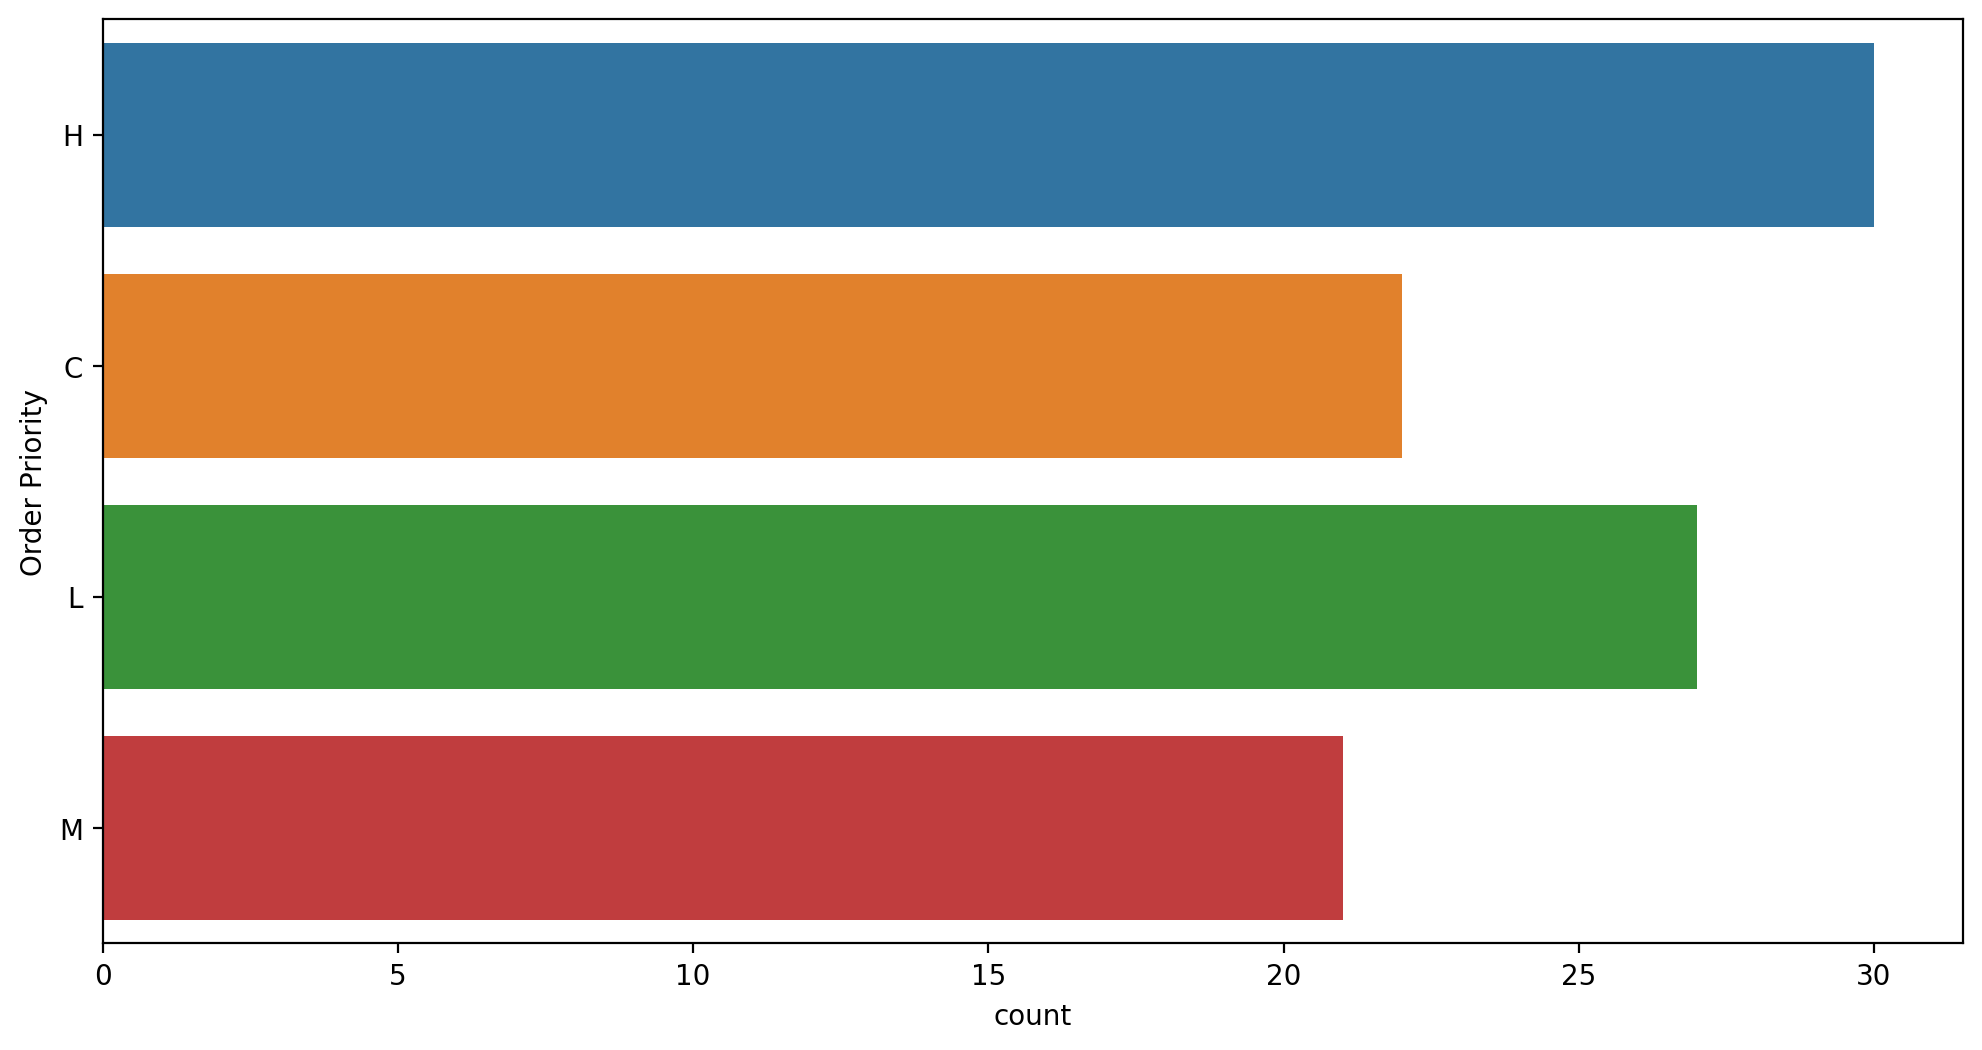

In [25]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(y = df['Order Priority'])
plt.show()

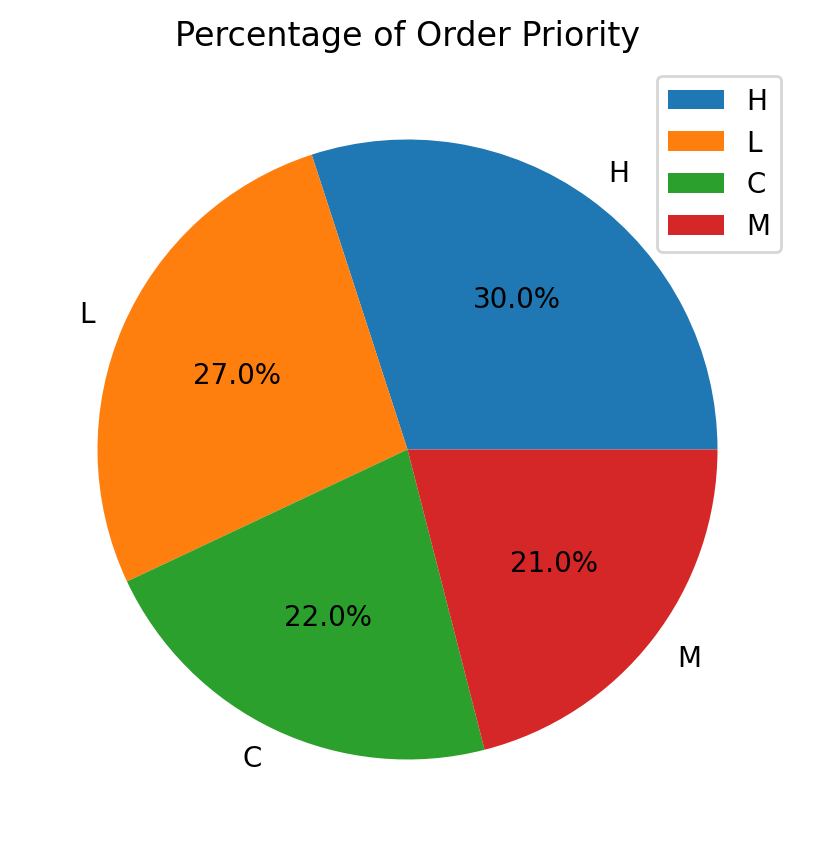

In [26]:

# Assuming df is your DataFrame containing the 'Order Priority' column
order_priority_counts = df['Order Priority'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5,6),dpi=200)  # Set the size of the plot
plt.pie(order_priority_counts, labels=order_priority_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Order Priority')
plt.legend()
plt.show()


## ANALYSING THE SHIP DATE COLUMN

In [27]:
df['Ship Date'].unique()

array(['6/27/2010', '9/15/2012', '5/8/2014', '7/5/2014', '2/6/2013',
       '2/21/2015', '4/27/2011', '7/27/2012', '8/25/2015', '5/30/2014',
       '7/12/2011', '8/19/2014', '3/1/2017', '2/13/2017', '2/23/2014',
       '6/3/2012', '12/18/2016', '4/18/2015', '1/20/2011', '9/11/2012',
       '6/28/2014', '9/3/2015', '7/26/2016', '10/4/2014', '5/10/2016',
       '6/5/2017', '11/10/2014', '5/10/2010', '7/30/2014', '6/9/2012',
       '10/20/2012', '1/28/2014', '11/25/2015', '3/1/2015', '2/25/2017',
       '5/21/2017', '12/3/2011', '1/23/2017', '5/8/2012', '2/28/2012',
       '3/28/2017', '2/25/2010', '6/8/2012', '11/10/2012', '11/18/2015',
       '4/29/2016', '12/31/2016', '1/31/2011', '11/14/2014', '1/13/2012',
       '3/18/2010', '9/18/2013', '3/28/2013', '1/7/2012', '10/24/2013',
       '6/27/2012', '8/1/2010', '3/2/2015', '2/14/2012', '4/19/2014',
       '7/2/2013', '7/1/2013', '11/15/2011', '11/17/2010', '11/16/2013',
       '11/25/2013', '7/9/2012', '9/7/2016', '5/28/2015', '5/20/2013

In [28]:
print("Creating a new column for year only : ")
print("Unique Years in Dataset : ")
# Assuming df is your DataFrame and 'Ship Date' is the column containing the dates
# Convert the 'Ship Date' column to datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract the year from the 'Ship Date' column
df['shipped_Year'] = df['Ship Date'].dt.year

# Now you have a new column 'Year' containing only the years from the 'Ship Date' column
print(df['shipped_Year'].unique())


Creating a new column for year only : 
Unique Years in Dataset : 
[2010 2012 2014 2013 2015 2011 2017 2016]


In [29]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,shipped_Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.50,951410.50,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,2012-09-15,2804,205.70,117.11,576782.8,328376.44,248406.36,2012


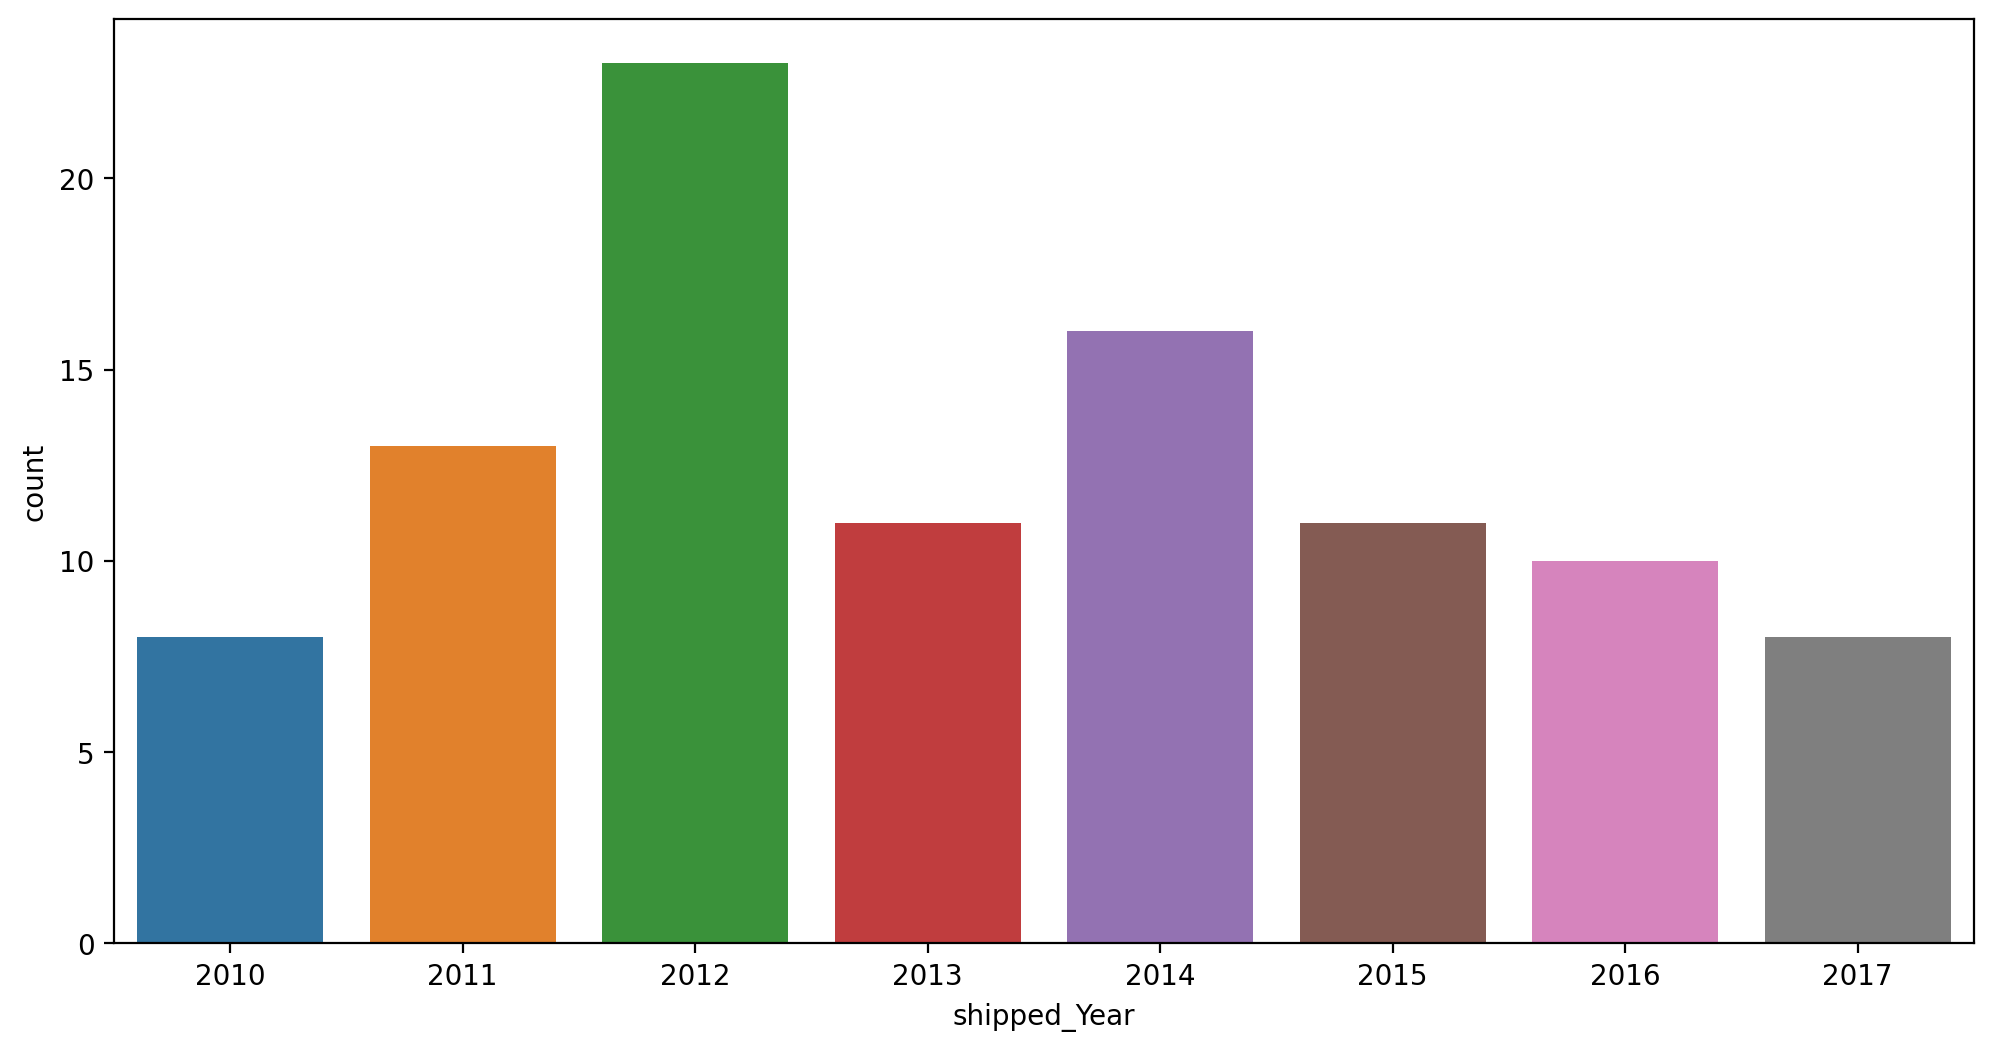

In [30]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(df['shipped_Year'])
plt.show()

In [31]:
df.groupby('shipped_Year')['Item Type'].value_counts().sort_values(ascending=False)

shipped_Year  Item Type      
2012          Office Supplies    5
              Household          4
2013          Cosmetics          4
2010          Clothes            3
2014          Beverages          3
2016          Cosmetics          3
2011          Beverages          3
2012          Vegetables         3
              Clothes            3
2014          Fruits             3
2013          Fruits             2
              Office Supplies    2
2010          Cosmetics          2
2014          Clothes            2
              Personal Care      2
2015          Baby Food          2
              Clothes            2
              Personal Care      2
2017          Personal Care      2
2013          Cereal             2
2014          Baby Food          2
2011          Vegetables         2
2012          Personal Care      2
              Cereal             2
2011          Fruits             2
              Household          2
2016          Snacks             1
2010          Fruits     

## ANALYSING COLUMN UNITS SOLD

In [32]:
df.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,shipped_Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.5,951410.5,2010


In [33]:
df['Units Sold'].unique()

array([9925, 2804, 1779, 8102, 5062, 2974, 4187, 8082, 6070, 6593,  124,
       4168, 8263, 8974, 4901, 1673, 6952, 5430, 3830, 5908, 7450, 1273,
       2225, 2187, 5070, 1815, 5398, 5822, 5124, 2370, 8661, 2125, 2924,
       8250, 7327, 6409, 3784, 4767, 6708, 3987, 3015, 7234, 2117,  171,
       5930,  962, 8867,  273, 7842, 1266, 2269, 9606, 4063, 3457, 7637,
       3482, 9905, 2847,  282, 7215,  682, 4750, 5518, 6116, 1705, 4477,
       8656, 5498, 8287, 7342, 5010,  673, 5741, 9892, 6954, 9379, 3732,
       8614, 9654, 4513, 7884, 6489, 4085, 6457, 6422, 8829, 5559,  522,
       4660,  948, 9389, 2021, 7910, 8156,  888, 6267, 1485, 5767, 5367],
      dtype=int64)

In [34]:
df['Units Sold'].nlargest(4)

0     9925
56    9905
74    9892
79    9654
Name: Units Sold, dtype: int64

In [35]:
print(df.loc[df['Units Sold'] == 9925, 'Item Type'])
print()
print(df.loc[df['Units Sold'] == 9905, 'Item Type'])
print()
print(df.loc[df['Units Sold'] == 9892, 'Item Type'])
print()
print(df.loc[df['Units Sold'] == 9654, 'Item Type'])


0    Baby Food
Name: Item Type, dtype: object

56    Clothes
Name: Item Type, dtype: object

74    Cosmetics
Name: Item Type, dtype: object

79    Cosmetics
Name: Item Type, dtype: object


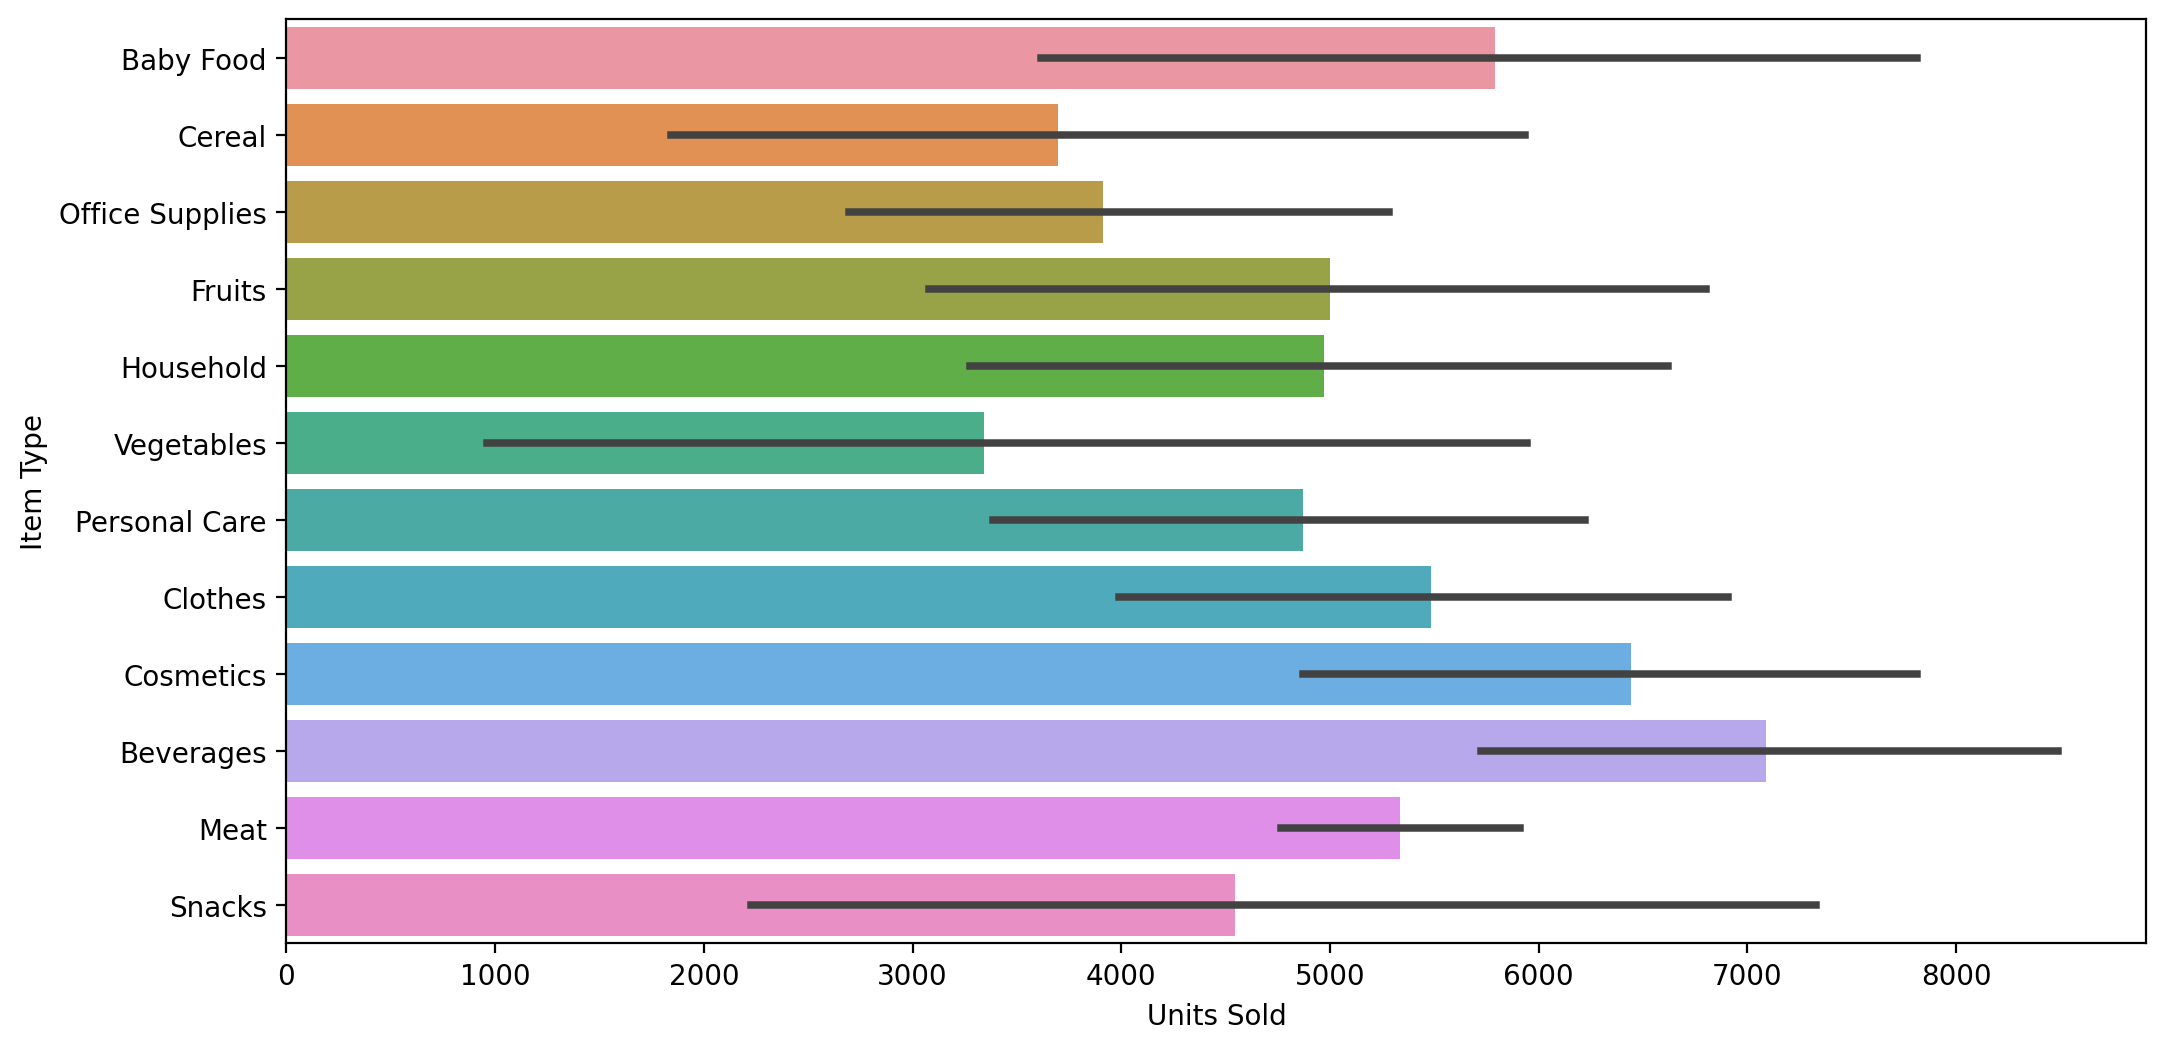

In [36]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(y='Item Type',x='Units Sold',data=df)
plt.show()

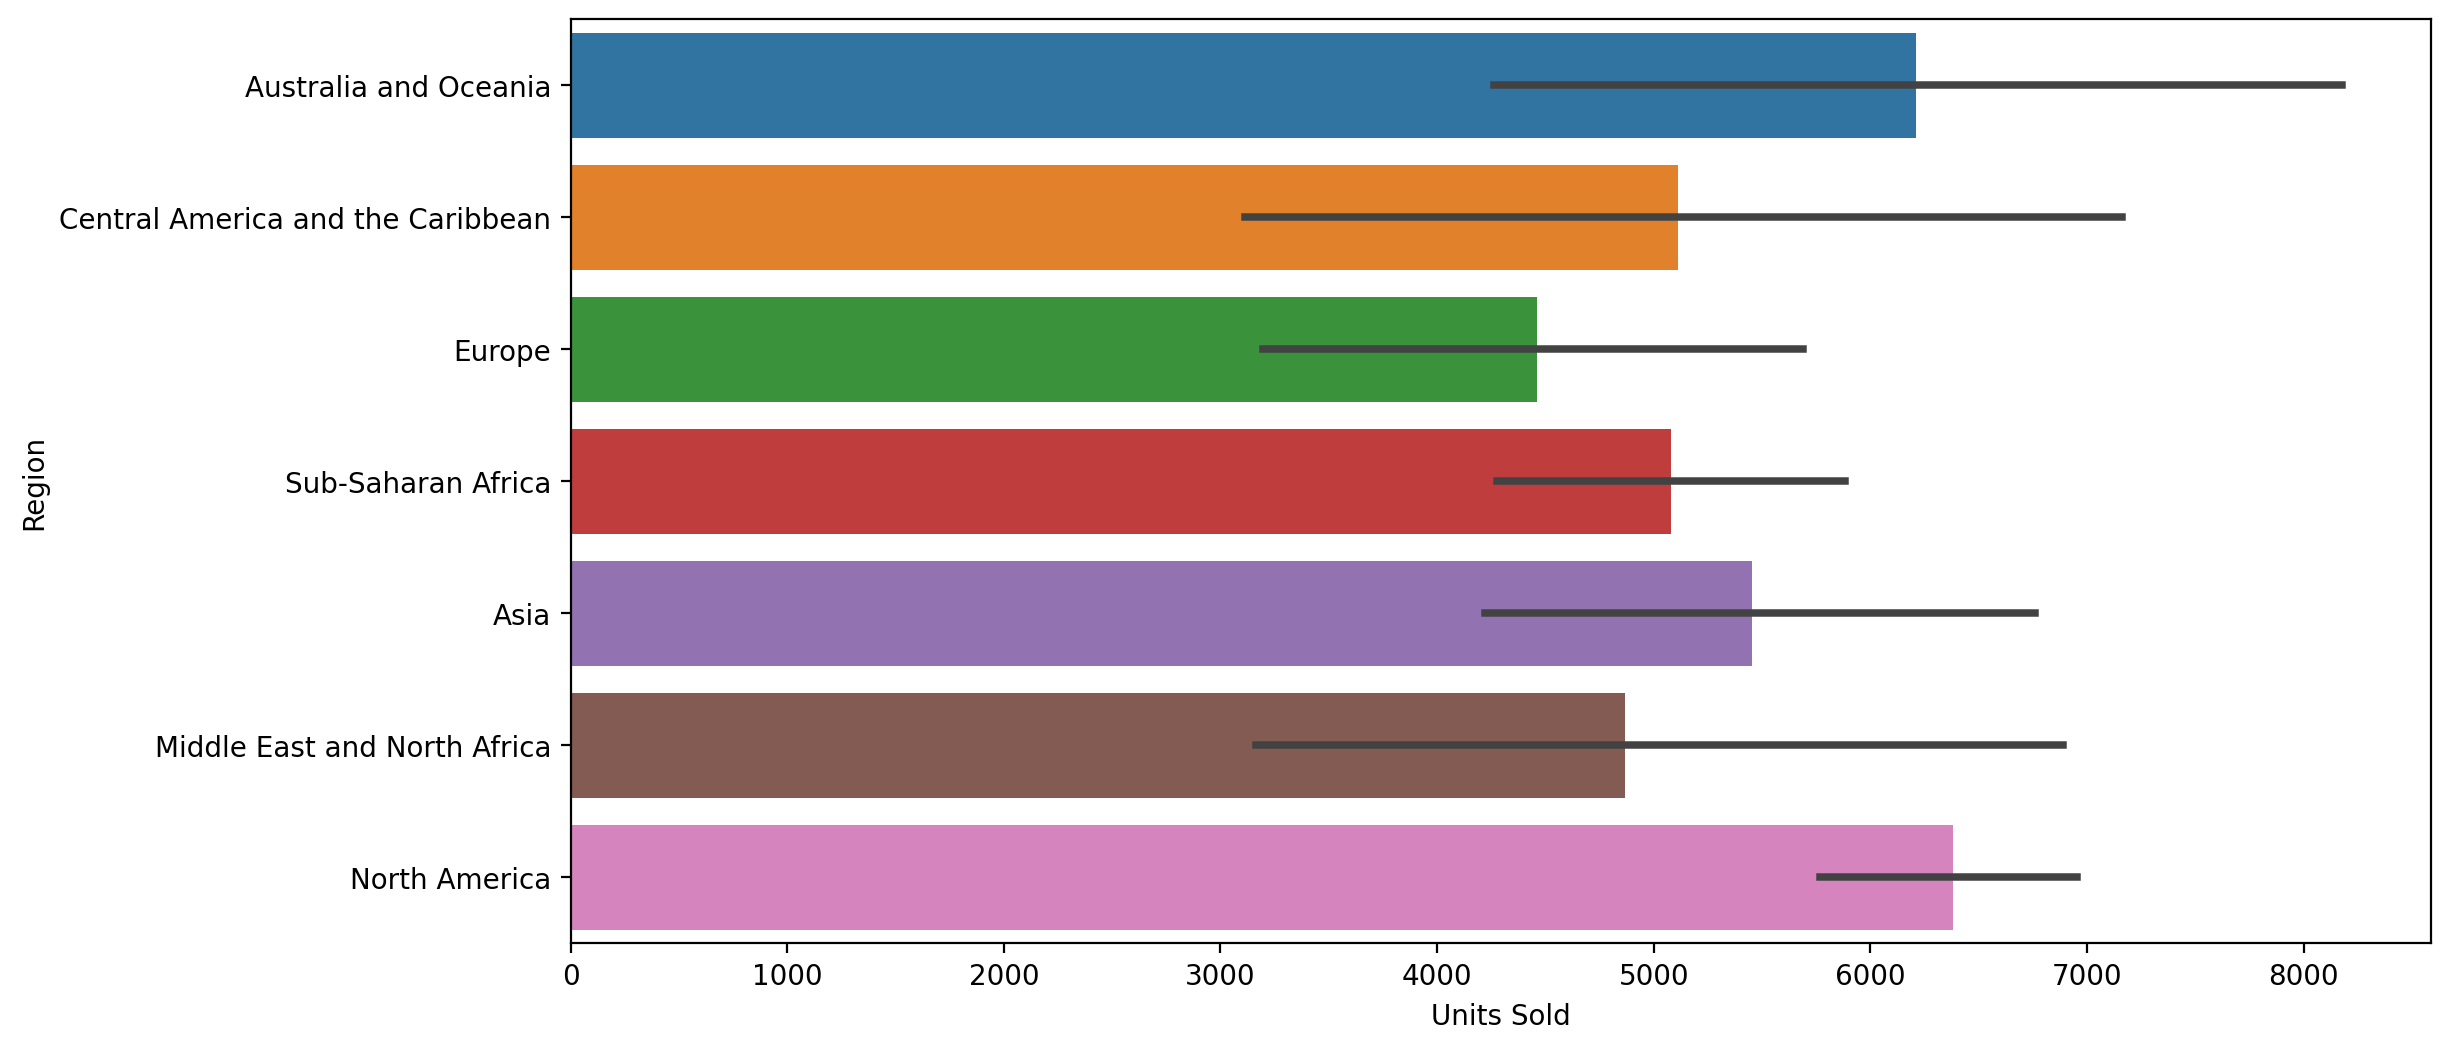

In [37]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(y='Region',x='Units Sold',data=df)
plt.show()

## ANALYSING COLUMN UNITS PRICE

In [39]:
df.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,shipped_Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.5,951410.5,2010


In [40]:
df['Unit Price'].mean()

276.76130000000006

In [45]:
df.groupby('Item Type')['Unit Price'].mean().sort_values(ascending=False)

Item Type
Household          668.27
Office Supplies    651.21
Cosmetics          437.20
Meat               421.89
Baby Food          255.28
Cereal             205.70
Vegetables         154.06
Snacks             152.58
Clothes            109.28
Personal Care       81.73
Beverages           47.45
Fruits               9.33
Name: Unit Price, dtype: float64

In [47]:
df.groupby(['Item Type','Sales Channel'])['Unit Price'].mean()

Item Type        Sales Channel
Baby Food        Offline          255.28
                 Online           255.28
Beverages        Offline           47.45
                 Online            47.45
Cereal           Offline          205.70
                 Online           205.70
Clothes          Offline          109.28
                 Online           109.28
Cosmetics        Offline          437.20
                 Online           437.20
Fruits           Offline            9.33
                 Online             9.33
Household        Offline          668.27
                 Online           668.27
Meat             Online           421.89
Office Supplies  Offline          651.21
                 Online           651.21
Personal Care    Offline           81.73
                 Online            81.73
Snacks           Online           152.58
Vegetables       Offline          154.06
                 Online           154.06
Name: Unit Price, dtype: float64

In [50]:
df.groupby('Sales Channel')['Unit Price'].mean()

Sales Channel
Offline    310.7206
Online     242.8020
Name: Unit Price, dtype: float64

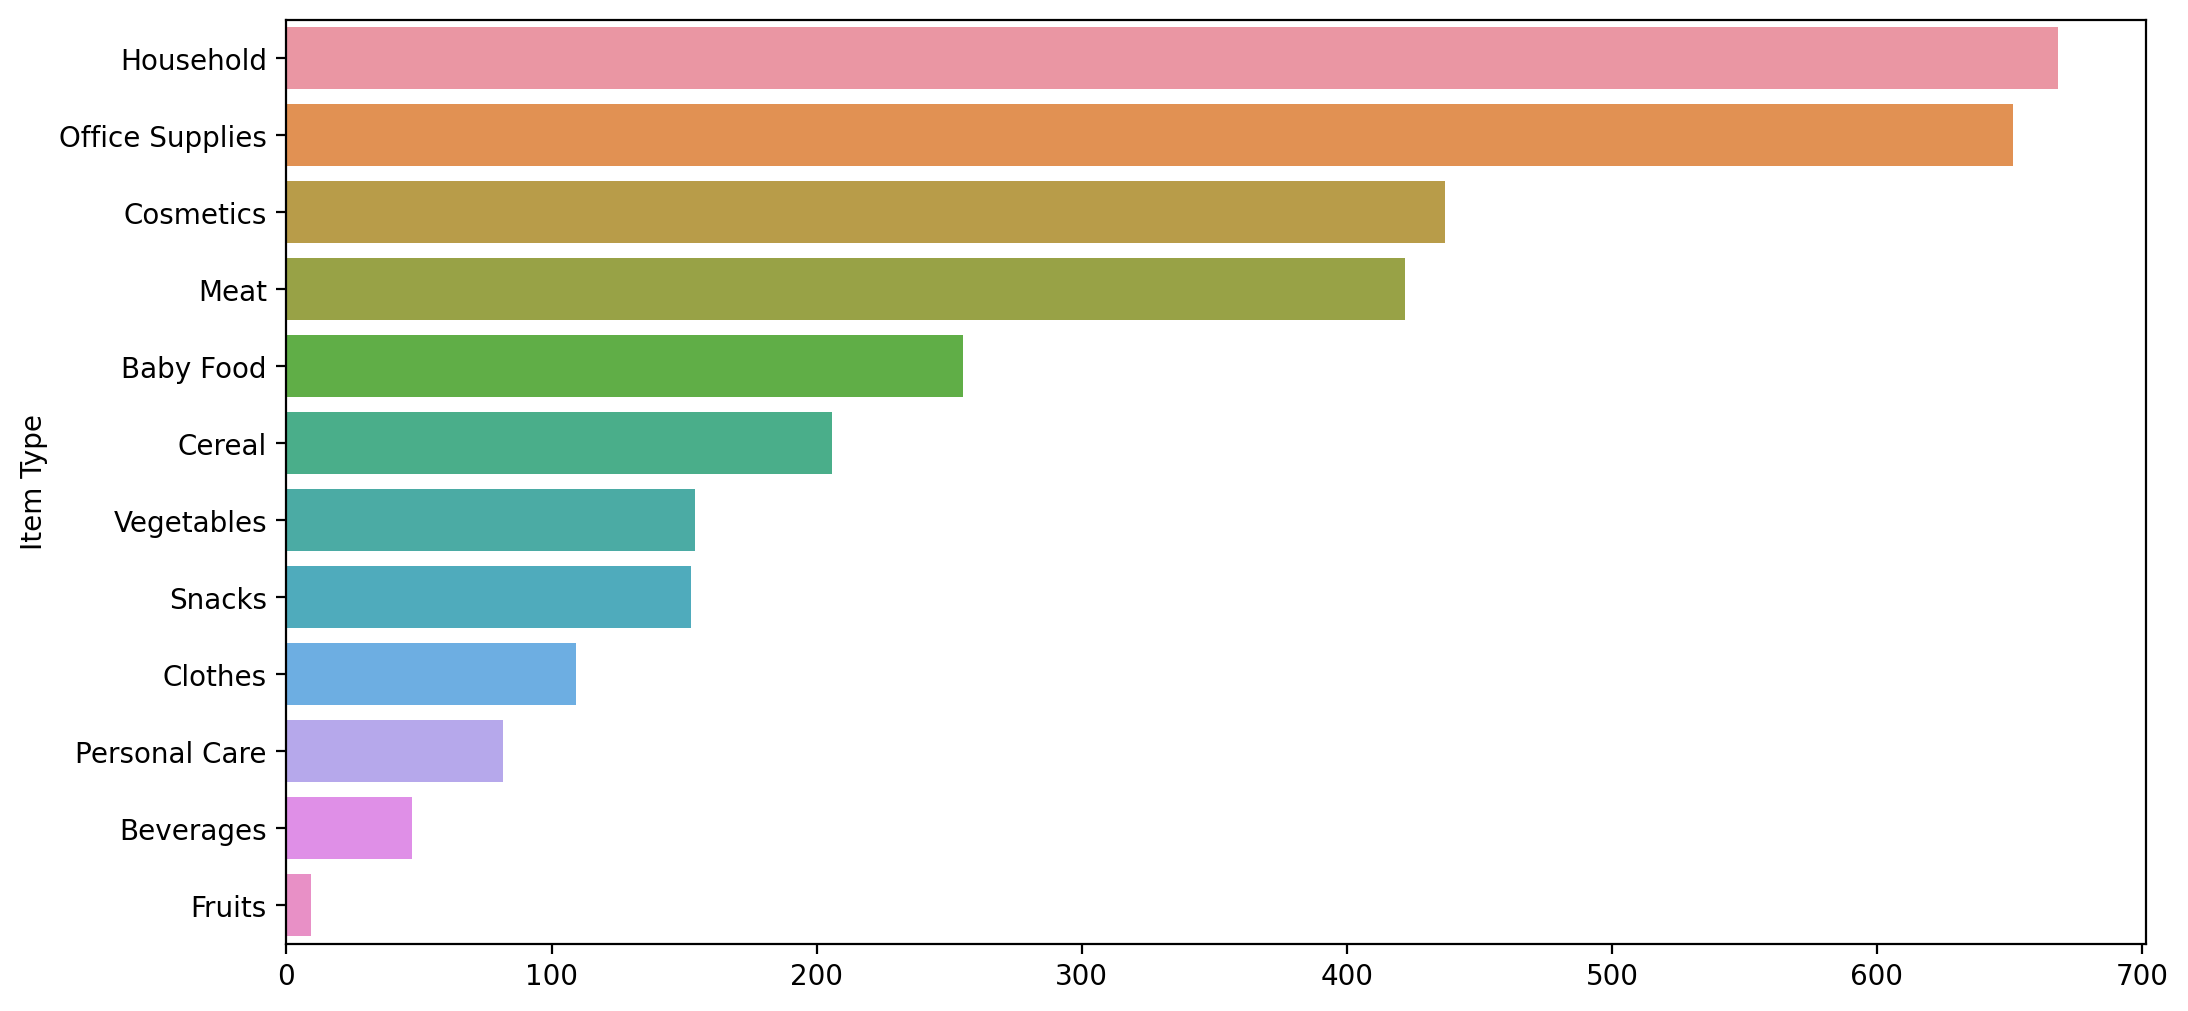

In [57]:
c = df.groupby('Item Type')['Unit Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(y=c.index,x=c.values)
plt.show()

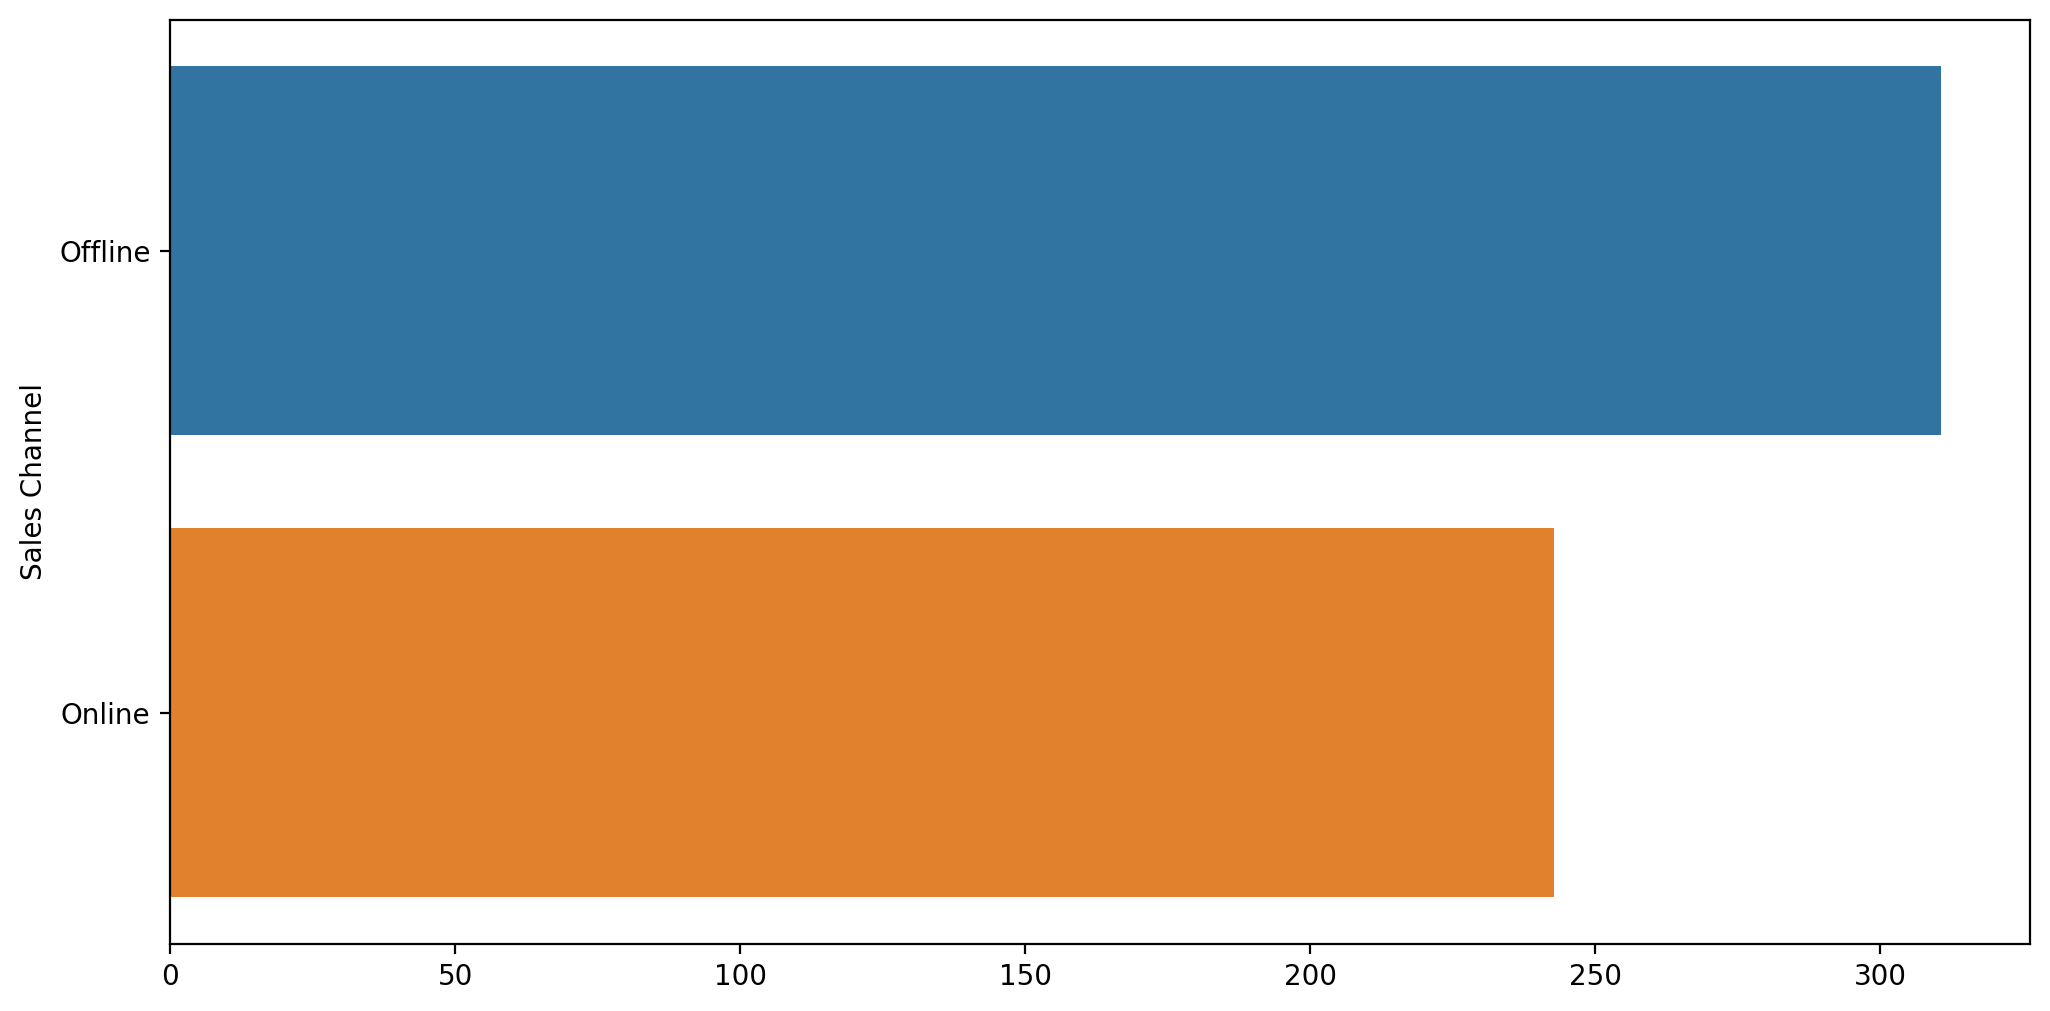

In [58]:
d = df.groupby('Sales Channel')['Unit Price'].mean()
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(y=d.index,x=d.values)
plt.show()

## ANALYSING COLUMN TOTAL PROFIT

In [59]:
df.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,shipped_Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.5,951410.5,2010


In [61]:
df['Total Profit'].mean()

441681.98399999994

In [62]:
df['Total Profit'].nlargest(3)

74    1719922.04
79    1678540.98
46    1541705.29
Name: Total Profit, dtype: float64

In [71]:
print("Details of largest 3 with maximum profit :")
print()
print(df.loc[df['Total Profit']==1719922.04])
print()
print(df.loc[df['Total Profit']==1678540.98])
print()
print(df.loc[df['Total Profit']==1541705.29])

Details of largest 3 with maximum profit :

                          Region   Country  Item Type Sales Channel  \
74  Middle East and North Africa  Pakistan  Cosmetics       Offline   

   Order Priority Order Date   Order ID  Ship Date  Units Sold  Unit Price  \
74              L   7/5/2013  231145322 2013-08-16        9892       437.2   

    Unit Cost  Total Revenue  Total Cost  Total Profit  shipped_Year  
74     263.33      4324782.4  2604860.36    1719922.04          2013  

                   Region Country  Item Type Sales Channel Order Priority  \
79  Australia and Oceania  Samoa   Cosmetics        Online              H   

   Order Date   Order ID  Ship Date  Units Sold  Unit Price  Unit Cost  \
79  7/20/2013  670854651 2013-08-07        9654       437.2     263.33   

    Total Revenue  Total Cost  Total Profit  shipped_Year  
79      4220728.8  2542187.82    1678540.98          2013  

    Region  Country  Item Type Sales Channel Order Priority  Order Date  \
46  Europe  I

In [79]:
df.groupby(['Item Type','shipped_Year'])['Total Profit'].sum().sort_values(ascending = False)

Item Type        shipped_Year
Cosmetics        2013            4473327.36
                 2016            3878691.96
                 2010            2633087.28
Office Supplies  2012            2201673.75
Household        2012            2076928.36
Cosmetics        2012            1505888.07
Household        2017            1487261.02
                 2015            1367272.50
Clothes          2010            1343217.60
Household        2011            1328657.41
Office Supplies  2013            1271590.00
Cosmetics        2014            1254472.05
Baby Food        2014            1247042.74
Household        2014            1152486.42
Office Supplies  2010            1046233.75
Clothes          2015             974695.68
                 2012             957584.16
Baby Food        2010             951410.50
Vegetables       2012             928642.30
Clothes          2014             882014.40
Baby Food        2012             825738.04
Cereal           2017             766835.04
Of

In [80]:
df.groupby(['Item Type'])['Total Profit'].sum().sort_values(ascending = False)

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [81]:
df.groupby(['Country'])['Total Profit'].sum().sort_values(ascending = False)

Country
Djibouti       2425317.87
Myanmar        1802771.70
Pakistan       1719922.04
Samoa          1678540.98
Honduras       1609947.52
                  ...    
Slovakia         10795.23
Syria             9119.44
Kyrgyzstan        7828.12
New Zealand       5270.67
Kuwait            1258.02
Name: Total Profit, Length: 76, dtype: float64

In [82]:
df.groupby(['Region'])['Total Profit'].sum().sort_values(ascending = False)

Region
Sub-Saharan Africa                   12183211.40
Europe                               11082938.63
Asia                                  6113845.87
Middle East and North Africa          5761191.86
Australia and Oceania                 4722160.03
Central America and the Caribbean     2846907.85
North America                         1457942.76
Name: Total Profit, dtype: float64

In [83]:
df.groupby(['Item Type','Order Priority'])['Total Profit'].sum().sort_values(ascending = False)

Item Type        Order Priority
Cosmetics        H                 7322013.44
                 M                 3972407.89
Household        H                 2854533.52
                 L                 2711674.26
Office Supplies  M                 2524116.25
Baby Food        H                 1899178.32
Clothes          C                 1725693.12
                 L                 1725032.16
Cosmetics        L                 1719922.04
Office Supplies  L                 1710561.25
Cereal           H                 1684095.90
Cosmetics        C                 1541705.29
Clothes          H                 1190756.16
Baby Food        L                 1169492.00
Office Supplies  H                 1165918.75
Household        C                 1152486.42
Beverages        C                  741015.54
Household        M                  693911.51
Personal Care    L                  665518.42
Clothes          M                  591852.96
Baby Food        M                  532885.74
Of

In [84]:
df.groupby(['Item Type','Sales Channel'])['Total Profit'].sum().sort_values(ascending = False)

Item Type        Sales Channel
Household        Offline          7365869.85
Cosmetics        Online           7297150.03
                 Offline          7258898.63
Office Supplies  Online           3303710.00
Clothes          Offline          3001566.24
Office Supplies  Offline          2625873.75
Baby Food        Offline          2310034.28
Clothes          Online           2231768.16
Cereal           Online           1959256.44
Baby Food        Online           1576609.42
Personal Care    Offline          1011171.00
Vegetables       Online            936470.42
Snacks           Online            751944.18
Beverages        Offline           651268.08
Meat             Online            610610.00
Cereal           Offline           333186.99
Vegetables       Offline           329349.21
Beverages        Online            236779.20
Personal Care    Online            209451.48
Fruits           Online             86986.54
Household        Online             46735.86
Fruits           Offline

In [86]:
df.groupby(['Sales Channel','shipped_Year'])['Total Profit'].sum().sort_values(ascending = False)

Sales Channel  shipped_Year
Offline        2012            5523497.07
               2014            4449802.50
Online         2012            4125959.30
Offline        2013            3512687.43
               2010            3174226.49
Online         2013            3149480.11
               2016            2919688.42
               2010            2813753.66
Offline        2015            2783145.89
Online         2017            2441482.89
Offline        2016            1984149.59
               2011            1845347.14
               2017            1647870.56
Online         2014            1482911.68
               2015            1213393.55
               2011            1100802.12
Name: Total Profit, dtype: float64